In [ ]:
#Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data 
#set for clustering using k-Means algorithm. Compare the results of these two 
#algorithms and comment on the quality of clustering. You can add Java/Python ML 
#library classes/API in the program

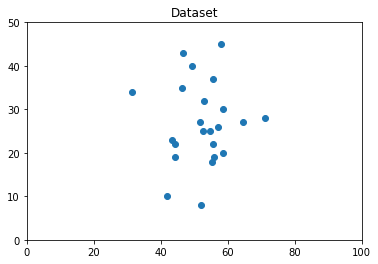


EM predictions
[0 2 0 2 2 1 2 1 1 1 2 0 1 2 2 2 2 2 2 0 1 0 2]
mean:
 [[60.46168489 33.61043   ]
 [42.86690558 19.33563098]
 [53.14347501 27.28953791]]


Covariances
 [[[ 41.48324368 -26.7739633 ]
  [-26.7739633   46.96212562]]

 [[ 37.4100568  -43.2866321 ]
  [-43.2866321   75.18396088]]

 [[ 14.00428487 -24.20646646]
  [-24.20646646  58.65890755]]]
[[71.24 28.  ]
 [52.53 25.  ]
 [64.54 27.  ]
 [55.69 22.  ]
 [54.58 25.  ]
 [41.91 10.  ]
 [58.64 20.  ]
 [52.02  8.  ]
 [31.25 34.  ]
 [44.31 19.  ]
 [49.35 40.  ]
 [58.07 45.  ]
 [44.22 22.  ]
 [55.73 19.  ]
 [46.63 43.  ]
 [52.97 32.  ]
 [46.25 35.  ]
 [51.55 27.  ]
 [57.05 26.  ]
 [58.45 30.  ]
 [43.42 23.  ]
 [55.68 37.  ]
 [55.15 18.  ]]


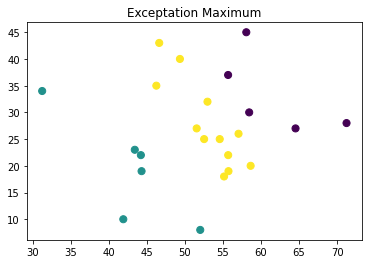

centroid and predications
[[45.176      16.4       ]
 [48.6        38.        ]
 [57.74090909 24.27272727]]
[2 2 2 2 2 0 2 0 1 0 1 1 0 2 1 1 1 2 2 2 0 1 2]


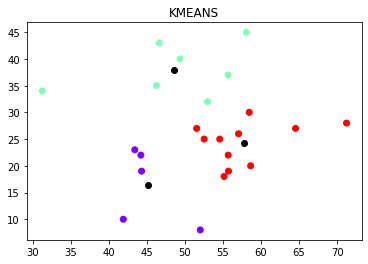

In [2]:
#code1 manual
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import pandas as pd

X=pd.read_csv("kmeansdata.csv")

x1 =  X['Distance_Feature'].values
x2 =  X['Speeding_Feature'].values

X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

plt.plot()
plt.xlim([0, 100])
plt.ylim([0, 50])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

#code for EM
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
em_predictions = gmm.predict(X) 
print("\nEM predictions")
print(em_predictions) 
print("mean:\n",gmm.means_)
print('\n')
print("Covariances\n",gmm.covariances_)
print(X)
plt.title('Exceptation Maximum')
plt.scatter(X[:,0], X[:,1],c=em_predictions,s=50)
plt.show()

#code for Kmeans
import matplotlib.pyplot as plt1
kmeans = KMeans(n_clusters=3)  
kmeans.fit(X)  
print("centroid and predications")
print(kmeans.cluster_centers_)  
print(kmeans.labels_)  

plt.title('KMEANS') 
plt1.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt1.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')  

accuracy of kmeans: 0.24
accuracy of Confusion matrix of km: [[ 0 50  0]
 [48  0  2]
 [14  0 36]]
accuracy score of EM: 0.36666666666666664
Confusion matrix of Em:
 [[50  0  0]
 [ 0  5 45]
 [ 0 50  0]]


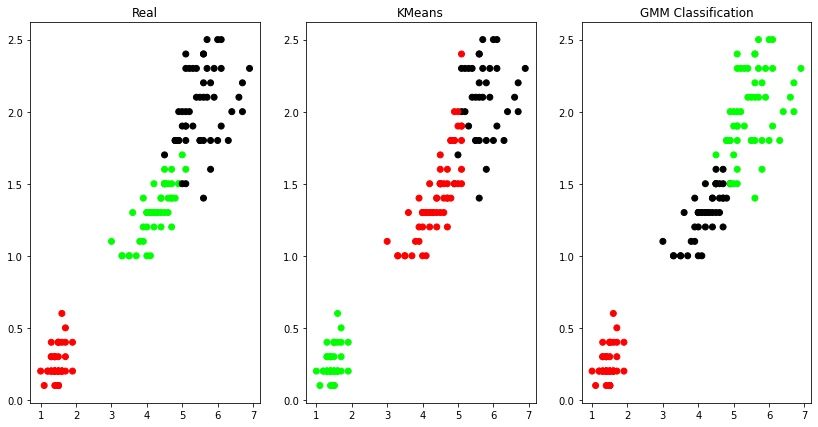

In [3]:
#code2 online iris dataset vtu
from sklearn.cluster import KMeans
import numpy as np
import sklearn.metrics as metrics
from sklearn.mixture import GaussianMixture
import pandas as pd
import matplotlib.pyplot as plt

names = ['Sepal__Length', 'Sepal__Width','Petal__Length', 'Petal__Width', 'Class']
dataset = pd.read_csv("irisdatasetkm.csv",names=names)
X=dataset.iloc[:, :-1]
label = {'Iris-setosa': 0,'Iris-versicolor': 1, 'Iris-virginica':2}
y=[label[c] for c in dataset.iloc[:, -1]]
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])
# real plot
plt.subplot(1,3,1)
plt.title('Real')
plt.scatter(X.Petal__Length, X.Petal__Width, c=colormap[y])

#kplot
model=KMeans(n_clusters=3,random_state=0).fit(X)
plt.subplot(1,3,2)
plt.title('KMeans')
plt.scatter(X.Petal__Length, X.Petal__Width, c=colormap[model.labels_])
print('accuracy of kmeans:',metrics.accuracy_score(y, model.labels_))
print('accuracy of Confusion matrix of km:',metrics.confusion_matrix(y, model.labels_))

#Gmm plot 

gmm=GaussianMixture(n_components=3,random_state=0).fit(X)

y_cluster_gmm=gmm.predict(X)
plt.subplot(1,3,3)
plt.title('GMM Classification')
plt.scatter(X.Petal__Length, X.Petal__Width, c=colormap[y_cluster_gmm])
print('accuracy score of EM:',metrics.accuracy_score(y,y_cluster_gmm))
print('Confusion matrix of Em:\n',metrics.confusion_matrix(y,y_cluster_gmm))



In [3]:
#code3 online
from sklearn import metrics,datasets
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
iris=datasets.load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target)
model=KMeans(n_clusters=3)
model1=GaussianMixture(n_components=3)
model.fit(X_train,y_train)
model.score
model1.fit(X_train,y_train)
model1.score
print(metrics.accuracy_score(y_test,model.predict(X_test)))
print(metrics.accuracy_score(y_test,model1.predict(X_test)))


0.47368421052631576
0.21052631578947367
